## Fake News Classifier with LSTM

### Recurrent Neural Network
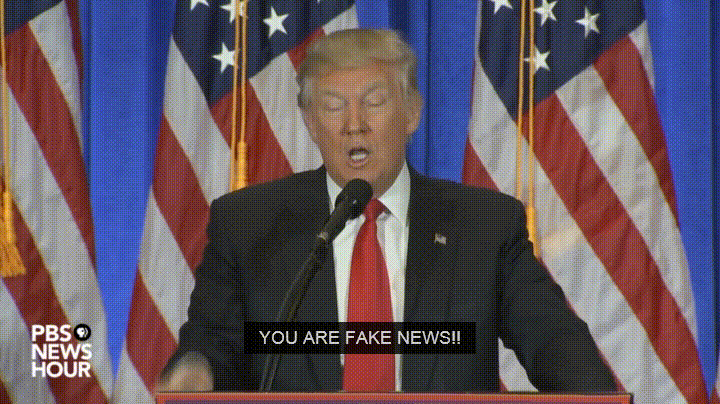

We got an accuracy of 91% by using Embedding layer and LSTM in Recurrent Neural Network


In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
#checking for missing values 
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [4]:
# making copy of the dataset
news= df.copy()

In [5]:
# we will remove NAN values
news.dropna(inplace=True)

In [6]:
news.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [7]:
news=news.reset_index(drop=True)
news.head(10)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [8]:
# now creating independent and dependent features
X= news.iloc[:,:4]
y=news.iloc[:,-1]

In [9]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


### Text cleaning and preprocessing
You and I would have understood that sentence in a fraction of a second. But machines simply cannot process text data in raw form. They need us to break down the text into a numerical format that’s easily readable by the machine (the idea behind Natural Language Processing!).


- Step1: preprocess and remove [,./?} ] these fullstop
- step2: Lower the text
- step3: create stemning
- step4: remove stopwords from text


In [10]:
# We will clean the text by using these library:
import nltk
import re   # regular expression
from nltk.corpus import stopwords # for removing stopwords from sentences
from nltk.stem.porter import PorterStemmer  #for stemning-- it will not make sentences into proper meaningful sentences 


In [11]:
ps=PorterStemmer()

In [12]:
corpus=[]
for i in range(len(news)):
    review= re.sub('[^a-zAZ]',' ',news['title'][i])
    review= review.lower()
    review= review.split()
    review= [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review= ' '.join(review)
    corpus.append(review)

### One_hot representation
Before jumping into creating a layer let’s take some vocabulary size. There might be a question of why vocabulary size? it is because we will be one hot encoding the sentences in the corpus for embedding layers. While one-hot encoding the words in sentences will take the index from the vocabulary size. Let’s fix the vocabulary size to 50000

In [13]:
from tensorflow.keras.preprocessing.text import one_hot


In [14]:
### Vocabulary size
voc_size=5000

In [15]:
onehot_repr= [one_hot(word,voc_size)for word in corpus]


## Embedding Representation---> features representation
All the neural networks require to have inputs that have the same shape and size. However, when we pre-process and use the texts as inputs for our LSTM model, not all the sentences have the same length. In other words, naturally, some of the sentences are longer or shorter. We need to have the inputs of the same size, this is where the padding is necessary. 
- In embedding layers all the inputs sentences of same lenght.As we can see in Onehot_rep sentences are not equal lenght


In [16]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences #to create embedding layers of equal size 
from tensorflow.keras.layers import Dropout

In [17]:
#creating embedding layer
sent_lenght=20 # fixing the padding sentence lenght
embedded_docs= pad_sequences(onehot_repr,padding='pre',maxlen=sent_lenght)

In [18]:
# Library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

### Deep learning-LSTM
We aren’t gonna use a normal neural network like ANN to classify but LSTM(long short-term memory) which helps in containing sequence information. Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. 
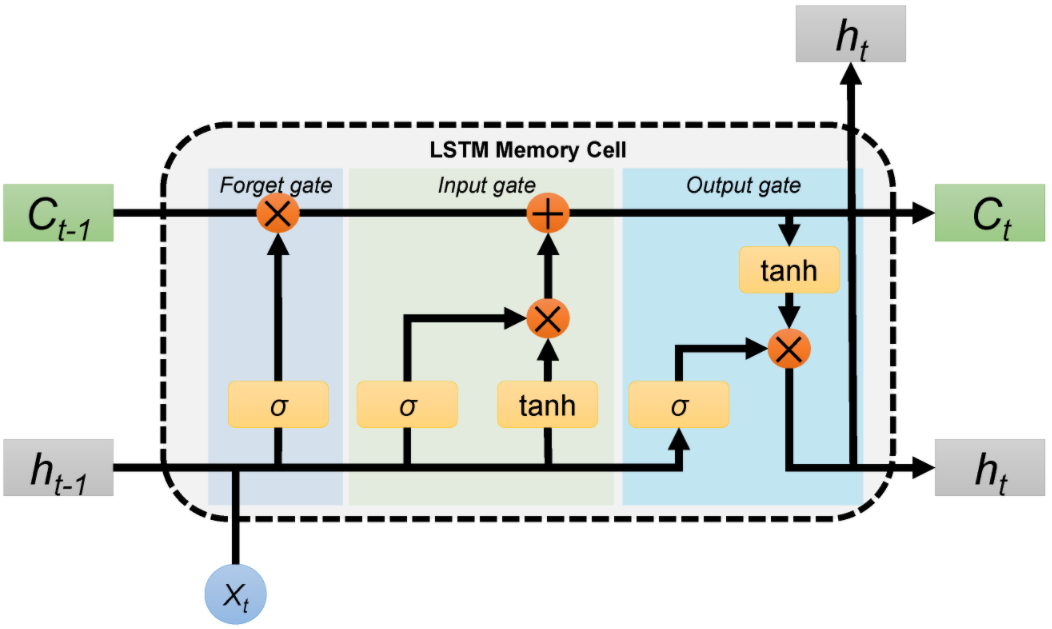

In [19]:
# creating Model
embedding_vector_features=40 # features size vectore
model=Sequential() #initilizing the model 
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_lenght)) # adding embedding layer
model.add(Dropout(0.3)) # Adding droping to avoid overfitting
model.add(LSTM(100)) #adding one layer of LSTM of 100 nuerons
model.add(Dropout(0.3)) 
model.add(Dense(units=1,activation='sigmoid')) #add output layer
## compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) # this classification
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


### Fitting the LSTM Model
Before fitting to the model, let’s consider the padded embedded object as X and y as y itself and convert them into an array.

In [20]:
 #Converting the X and y as array
X_final=np.array(embedded_docs)
y_final=np.array(y)

#Check shape of X and y final
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [21]:
len(embedded_docs),y.shape

(18285, (18285,))

Let’s split our new X and y variable into train and test and proceed with fitting the model to the data. We have considered 15 epochs and 60 as batch size. It can be varied to get better results.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)


### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)


Epoch 1/10
192/192 [==============================] - 9s 31ms/step - loss: 0.3394 - accuracy: 0.8396 - val_loss: 0.1893 - val_accuracy: 0.9193
Epoch 2/10
192/192 [==============================] - 6s 30ms/step - loss: 0.1471 - accuracy: 0.9421 - val_loss: 0.1903 - val_accuracy: 0.9241
Epoch 3/10
192/192 [==============================] - 6s 31ms/step - loss: 0.1087 - accuracy: 0.9582 - val_loss: 0.2058 - val_accuracy: 0.9223
Epoch 4/10
192/192 [==============================] - 6s 31ms/step - loss: 0.0810 - accuracy: 0.9691 - val_loss: 0.2149 - val_accuracy: 0.9236
Epoch 5/10
192/192 [==============================] - 6s 31ms/step - loss: 0.0615 - accuracy: 0.9794 - val_loss: 0.2330 - val_accuracy: 0.9226
Epoch 6/10
192/192 [==============================] - 6s 31ms/step - loss: 0.0445 - accuracy: 0.9854 - val_loss: 0.2455 - val_accuracy: 0.9196
Epoch 7/10
192/192 [==============================] - 6s 33ms/step - loss: 0.0374 - accuracy: 0.9887 - val_loss: 0.2790 - val_accuracy: 0.9234

### Evaluation of model
Now, let’s predict the output for our test data and evaluate the predicted values with y_test.

In [23]:

model.evaluate(X_test, y_test)

189/189 [==============================] - 1s 6ms/step - loss: 0.3385 - accuracy: 0.9210


[0.33854013681411743, 0.9209610819816589]

In [24]:
y_pred= model.predict(X_test)

In [25]:
import numpy as np
y_pred_classes= [np.argmax(element) for element in y_pred]